In [ ]:
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
from models.embedder_with_classification_head.embedders import (
    SentenceTransformerEmbedder,
)
from models.embedder_with_classification_head.classification_heads import (
    NeuralNetClassifier,
    GenericSklearnCalssifier,
)

from datetime import datetime
from matplotlib.colors import ListedColormap

from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, Matern
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import random
from sklearn.model_selection import RandomizedSearchCV, ParameterSampler
import os
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, ParameterSampler


In [2]:
params = {
    "solver": "adam",
    "random_state": 42,
    "max_iter": 1500,
    "learning_rate_init": 0.001,
    "hidden_layer_sizes": (64, 32),
    "alpha": 0.01,
    "activation": "relu",
}

dataloader = AnnotationDataLoader()

embedder = SentenceTransformerEmbedder("NeuML/pubmedbert-base-embeddings")
classifier = GenericSklearnCalssifier(MLPClassifier, model_kwargs=params)
embedder_m = EmbedderClassifier(embedder, classifier)

embedder_m.train(dataloader.get_train())
embedder_m.model_info = str(params)
embedder_m.model_title = "NeuML/pubmedbert-base-embeddings"

# eval the model
m = ModelEvaluator(embedder_m, dataloader.get_validation())
c_report = m.generate_report(include_probablities=True)



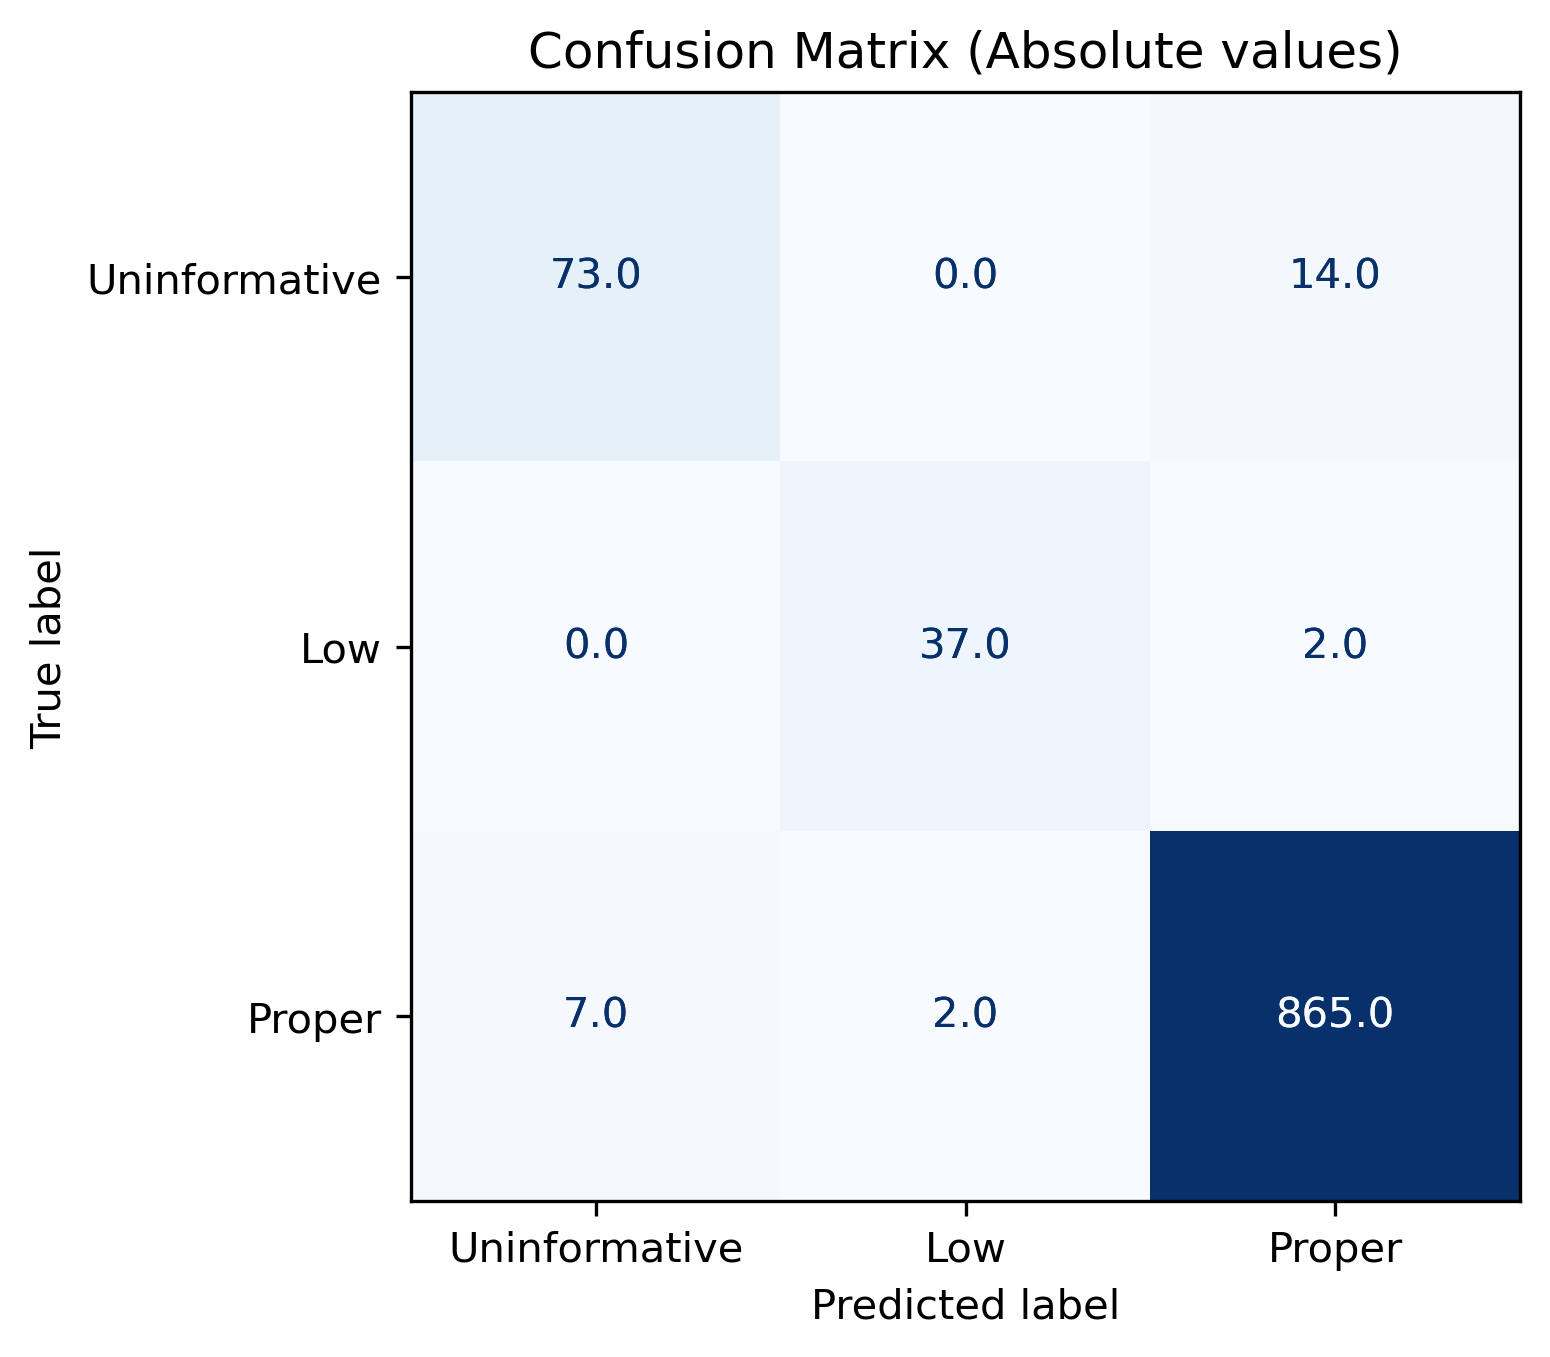
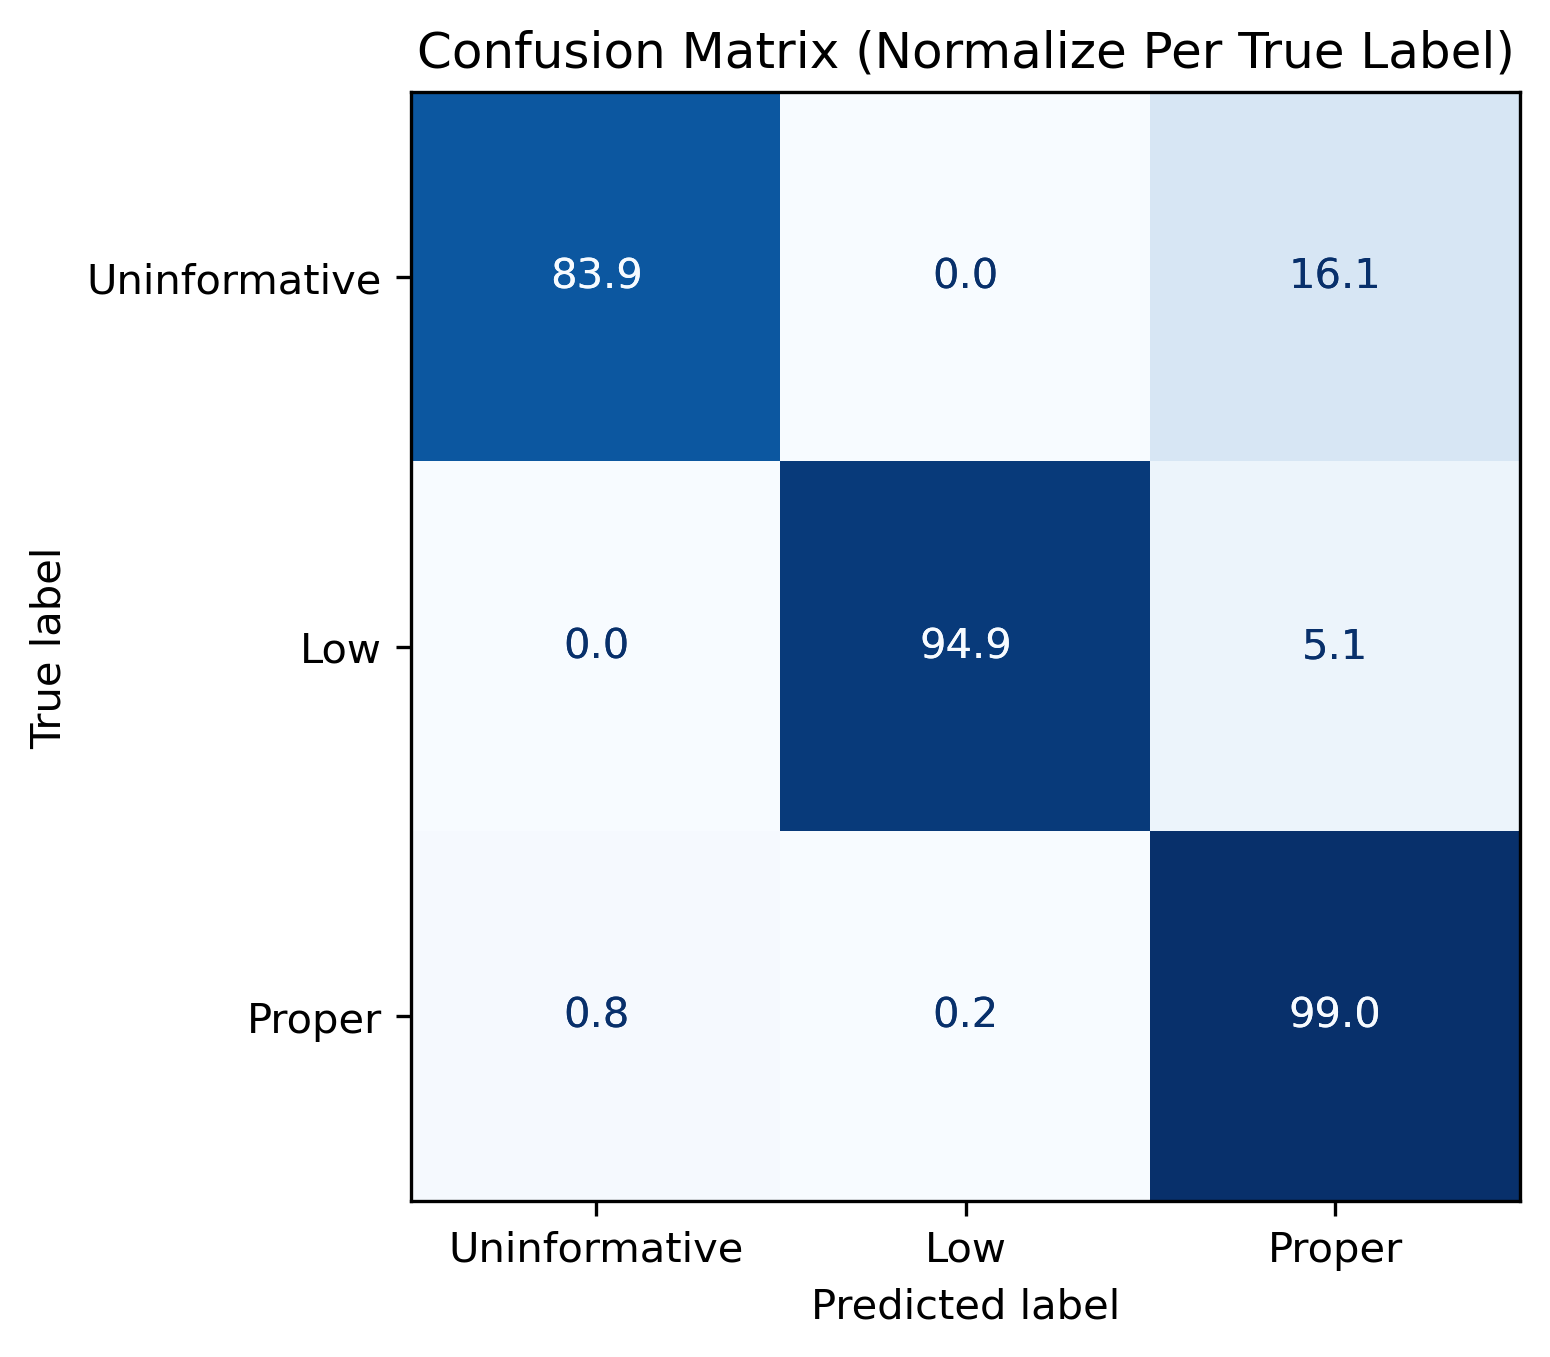

In [3]:
c_report.show_report()

In [ ]:
# pdf = c_report.prediction_df()
# mis_classified = pdf[pdf["true_label"] != pdf["predicted_label"]]
mis_classified[mis_classified[]]

,protein_annotation,true_label,predicted_label,predicted_proba_0,predicted_proba_1,predicted_proba_2
31,Uncharacterized homolog ofphage Mu protein gp47,2,0,6.239961e-01,3.977623e-06,0.376000
35,Bordetella phage Bbp38 like protein,0,2,3.889030e-03,2.363632e-05,0.996087
52,Protein A,0,2,9.552823e-02,3.161614e-06,0.904469
56,LvrE,0,2,2.342579e-03,5.495970e-07,0.997657
91,Cell wall protein containing Ig-like domains (...,1,2,5.528462e-07,3.219551e-06,0.999996
131,Aste57867_24821 protein,2,0,9.999613e-01,1.863326e-06,0.000037
232,WD40 repeat domain protein,2,1,2.983600e-04,7.368805e-01,0.262821
268,Bbp50,0,2,3.193968e-01,6.272470e-05,0.680541
353,Mu-like prophage protein gp46,0,2,4.512923e-01,3.201757e-04,0.548388
375,Phage eae protein,2,0,6.541956e-01,7.184597e-04,0.345086


In [ ]:
dataloader = AnnotationDataLoader()

embedder_bin = SentenceTransformerEmbedder("NeuML/pubmedbert-base-embeddings")
classifier_bin = GenericSklearnCalssifier(MLPClassifier, model_kwargs=params)
embedder_m_bin = EmbedderClassifier(embedder, classifier)

train_df = dataloader.get_train()


In [26]:
# train_df = dataloader.get_train()

# train_df.loc[train_df["label"] != 2, "label"] = 0
# train_df.loc[train_df["label"] == 2, "label"] = 1
# train_df["label"].value_counts()
train_dfbin = train_df

In [27]:
embedder_m.train(train_dfbin)

# eval the model
# m = ModelEvaluator(embedder_m, dataloader.get_validation())
# c_report = m.generate_report(include_probablities=True)

In [ ]:
# val_df = dataloader.get_validation()
# val_df.loc[val_df["label"] != 2, "label"] = 0
# val_df.loc[val_df["label"] == 2, "label"] = 1
# val_df["label"].value_counts()
# val_dfbin = val_df

label
1    874
0    126
Name: count, dtype: int64

In [46]:
# preds = embedder_m.predict(val_dfbin["protein_annotation"])
probs = embedder_m.predict(val_dfbin["protein_annotation"], probablities=True)
# y_true = val_dfbin["label"]

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [42]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       126
           1       0.98      0.99      0.98       874

    accuracy                           0.97      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.97      0.97      0.97      1000



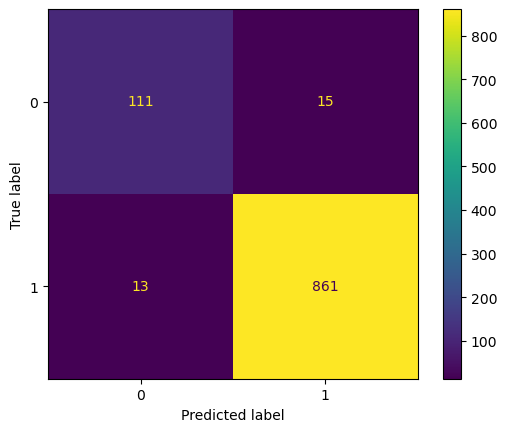

In [45]:
ConfusionMatrixDisplay.from_predictions(y_true, preds)

In [47]:
probs

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.1920929e-07, 9.9999988e-01]], dtype=float32)